In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [2]:
df = pd.read_csv(r"C:\Users\ohtha\Downloads\tech_adoption_readiness_dashboard (1).csv")

In [3]:
df.head()

,Company Name,Company Size,Industry,Region,Tech Adoption Year,Adoption Score,GDP per Capita,Market Trend,Regulation Score,Influencer Score,Feedback Score
0,Company_1,Large,Retail,Asia,2005.0,5.24,42947.82,Upward,1.5,3.45,7.62
1,Company_2,Small,Manufacturing,Europe,2001.0,8.48,47925.39,Downward,1.0,8.03,8.12
2,Company_3,Large,Technology,Africa,2017.0,8.40,44622.44,Downward,1.2,5.40,3.42
3,Company_4,Large,Retail,North America,2012.0,8.33,51865.38,Stable,4.5,0.79,4.34
4,Company_5,Small,Healthcare,Europe,2008.0,0.11,10365.32,Upward,2.3,5.66,8.48


In [4]:
df.describe()

,Tech Adoption Year,Adoption Score,GDP per Capita,Regulation Score,Influencer Score,Feedback Score
count,649.000000,632.000000,627.000000,643.000000,649.000000,643.000000
mean,2011.403698,4.984652,40867.082121,2.445879,4.905023,4.978227
std,6.958900,2.957588,17123.082691,1.425511,2.901752,2.857560
min,2000.000000,0.000000,10026.570000,0.000000,0.000000,0.010000
25%,2005.000000,2.337500,26017.835000,1.300000,2.350000,2.615000
50%,2011.000000,5.045000,42057.430000,2.400000,4.830000,4.840000
75%,2017.000000,7.562500,55767.735000,3.600000,7.510000,7.365000
max,2023.000000,10.000000,69972.640000,5.000000,9.970000,9.990000


In [5]:
print(df.shape)

(650, 11)


In [6]:
print(df.columns)

Index(['Company Name', 'Company Size', 'Industry', 'Region',
       'Tech Adoption Year', 'Adoption Score', 'GDP per Capita',
       'Market Trend', 'Regulation Score', 'Influencer Score',
       'Feedback Score'],
      dtype='object')


In [7]:
print(df.dtypes)

Company Name           object
Company Size           object
Industry               object
Region                 object
Tech Adoption Year    float64
Adoption Score        float64
GDP per Capita        float64
Market Trend           object
Regulation Score      float64
Influencer Score      float64
Feedback Score        float64
dtype: object


In [8]:
df.isnull().sum()

Company Name           0
Company Size           4
Industry               7
Region                 1
Tech Adoption Year     1
Adoption Score        18
GDP per Capita        23
Market Trend           8
Regulation Score       7
Influencer Score       1
Feedback Score         7
dtype: int64

In [9]:
categorical_columns = ['Company Size', 'Industry', 'Region', 'Market Trend']
numerical_columns = ['Tech Adoption Year', 'Adoption Score', 'GDP per Capita', 
                     'Regulation Score', 'Influencer Score', 'Feedback Score']

 missing values for categorical data

In [10]:
df['Company Size'].fillna(df['Company Size'].mode()[0], inplace=True)
df['Industry'].fillna('Other', inplace=True)
df['Region'].fillna(df['Region'].mode()[0], inplace=True)
df['Market Trend'].fillna('Stable', inplace=True)

missing values for numerical data

In [11]:
df['Tech Adoption Year'].fillna(df['Tech Adoption Year'].median(), inplace=True)
df['Adoption Score'].fillna(df['Adoption Score'].median(), inplace=True)
df['GDP per Capita'].fillna(df['GDP per Capita'].median(), inplace=True)
df['Regulation Score'].fillna(df['Regulation Score'].median(), inplace=True)
df['Influencer Score'].fillna(df['Influencer Score'].median(), inplace=True)
df['Feedback Score'].fillna(df['Feedback Score'].median(), inplace=True)

In [12]:
df.isnull().sum()

Company Name          0
Company Size          0
Industry              0
Region                0
Tech Adoption Year    0
Adoption Score        0
GDP per Capita        0
Market Trend          0
Regulation Score      0
Influencer Score      0
Feedback Score        0
dtype: int64

Descriptive Analysis

Distribution of Adoption Score

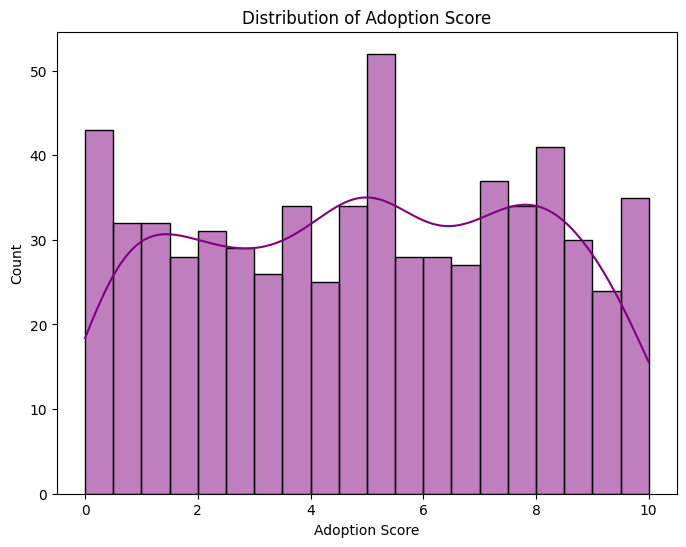

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Adoption Score'], kde=True, bins=20, color='purple')
plt.title("Distribution of Adoption Score")
plt.show()




Adoption Score by Company Size

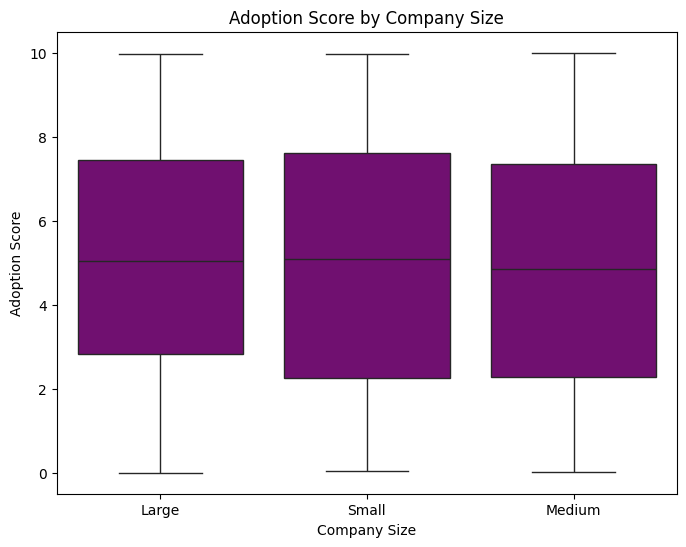

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Company Size', y='Adoption Score', data=df,color='purple')
plt.title("Adoption Score by Company Size")
plt.show()


Correlation Analysis

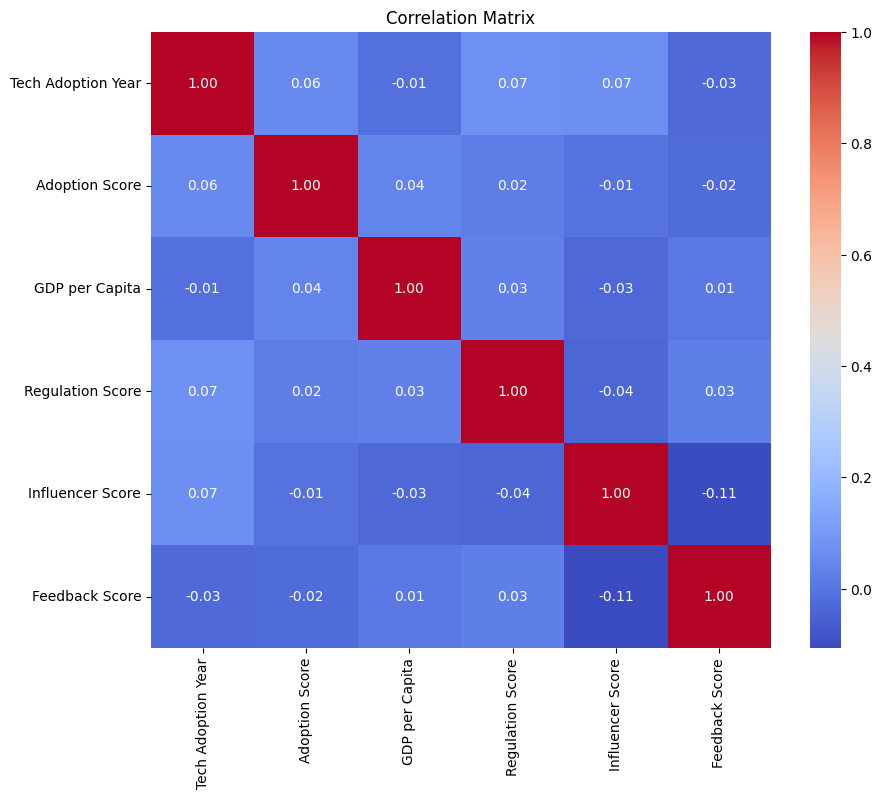

In [15]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

 Segment Analysis

Average Adoption Score by Industry and Region

In [16]:
industry_region_analysis = df.groupby(['Industry', 'Region'])['Adoption Score'].mean().reset_index()
print(industry_region_analysis)

         Industry         Region  Adoption Score
0         Finance         Africa        5.108542
1         Finance           Asia        4.529048
2         Finance         Europe        4.608226
3         Finance  North America        4.791379
4         Finance  South America        4.701452
5      Healthcare         Africa        5.703077
6      Healthcare           Asia        5.551875
7      Healthcare         Europe        4.205517
8      Healthcare  North America        5.336364
9      Healthcare  South America        5.186346
10  Manufacturing         Africa        4.435714
11  Manufacturing           Asia        5.297857
12  Manufacturing         Europe        4.635769
13  Manufacturing  North America        4.473125
14  Manufacturing  South America        5.403182
15          Other         Africa        8.530000
16          Other           Asia        8.940000
17          Other         Europe        6.035000
18          Other  North America        6.060000
19          Other  S

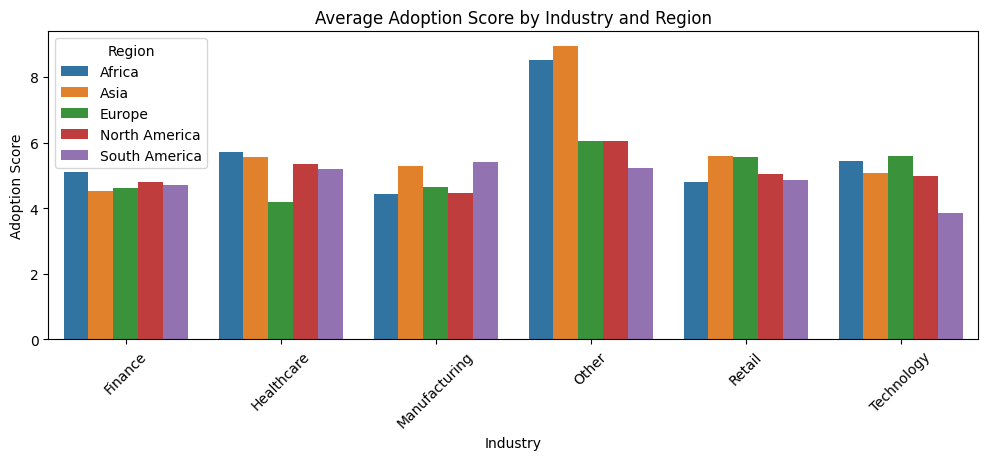

In [50]:
plt.figure(figsize=(12, 4))
sns.barplot(x='Industry', y='Adoption Score', hue='Region', data=industry_region_analysis)
plt.xticks(rotation=45)
plt.title("Average Adoption Score by Industry and Region")
plt.show()

 Industry-Based Segmentation

In [18]:
industry_analysis = df.groupby('Industry')['Adoption Score'].mean().sort_values(ascending=False)
print(industry_analysis)

Industry
Other            6.578571
Healthcare       5.163228
Retail           5.145346
Technology       5.000789
Manufacturing    4.816765
Finance          4.744596
Name: Adoption Score, dtype: float64


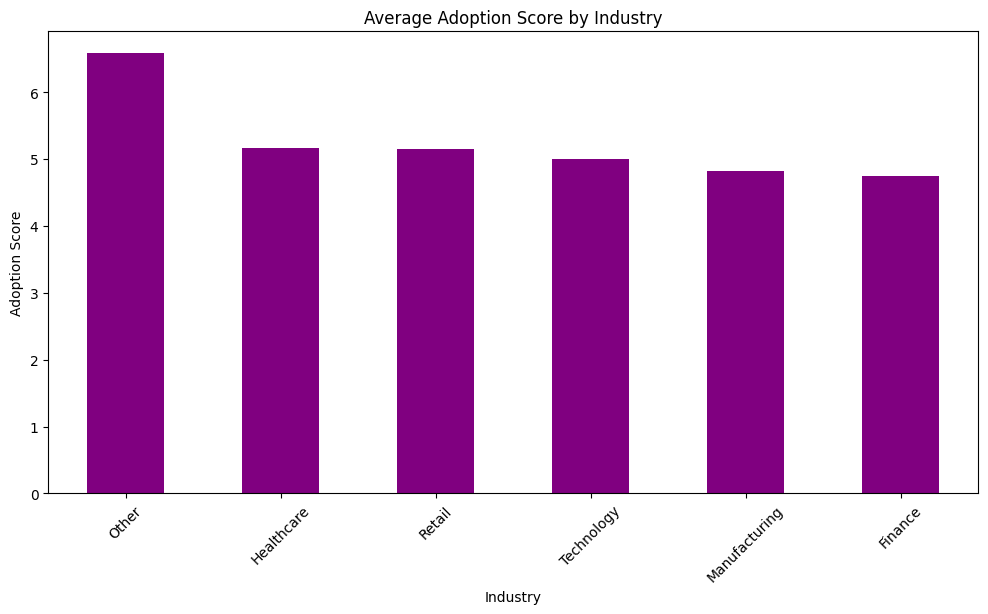

In [19]:
plt.figure(figsize=(12, 6))
industry_analysis.plot(kind='bar', color="purple")
plt.title("Average Adoption Score by Industry")
plt.xlabel("Industry")
plt.ylabel("Adoption Score")
plt.xticks(rotation=45)
plt.show()


Company Size Segmentation

In [20]:
size_analysis = df.groupby('Company Size')['Adoption Score'].mean()
print(size_analysis)


Company Size
Large     5.045762
Medium    4.914830
Small     4.995919
Name: Adoption Score, dtype: float64


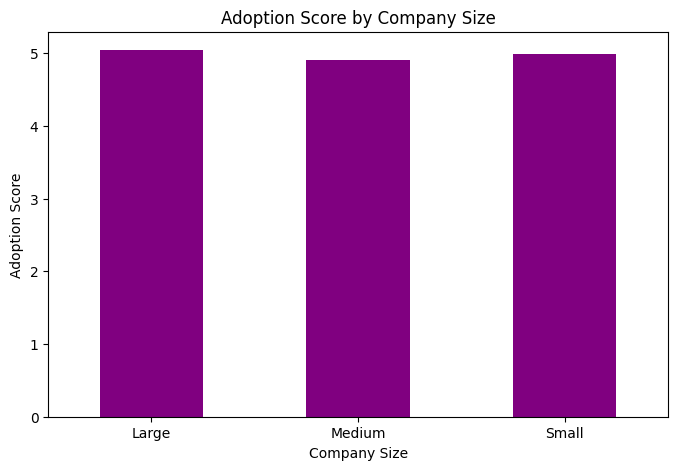

In [21]:
plt.figure(figsize=(8, 5))
size_analysis.plot(kind='bar', color='purple')
plt.title("Adoption Score by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Adoption Score")
plt.xticks(rotation=0)
plt.show()

Clustering Segmentation

In [22]:
clustering_features = df[['Adoption Score', 'Regulation Score', 'Influencer Score', 'GDP per Capita']]

In [23]:
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)


In [24]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(clustering_features_scaled)


C:\Users\ohtha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
numeric_columns = df.select_dtypes(include=['number']).columns
cluster_summary = df[numeric_columns].groupby('Cluster').mean()
print(cluster_summary)



         Tech Adoption Year  Adoption Score  GDP per Capita  Regulation Score  \
Cluster                                                                         
0               2010.947154        4.734797    40994.655447          0.999593   
1               2011.835106        6.334787    56777.247234          3.294681   
2               2011.546296        4.099120    27000.803981          3.352778   

         Influencer Score  Feedback Score  
Cluster                                    
0                5.418740        4.908455  
1                4.145053        5.196330  
2                4.981065        4.863380  


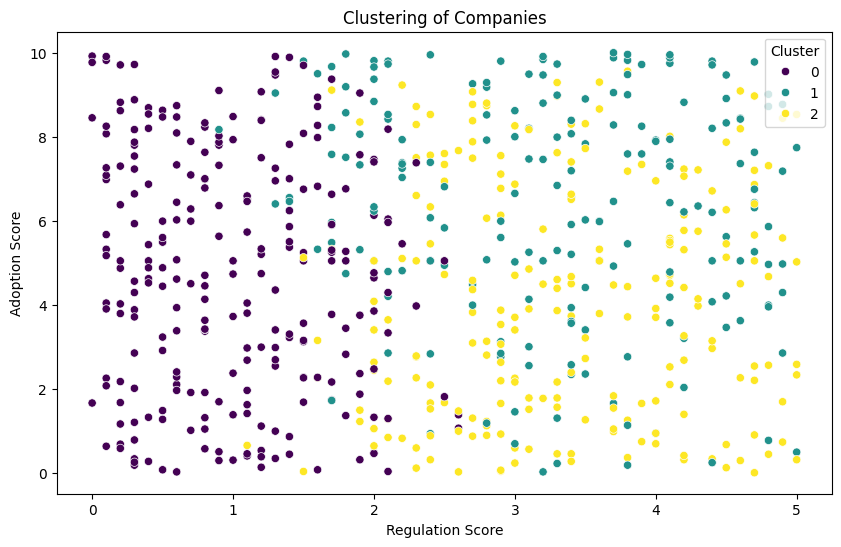

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Regulation Score', y='Adoption Score', hue='Cluster', data=df, palette='viridis')
plt.title("Clustering of Companies")
plt.xlabel("Regulation Score")
plt.ylabel("Adoption Score")
plt.show()


Market Trend Segmentation

In [27]:
trend_analysis = df.groupby('Market Trend')['Adoption Score'].mean().sort_values(ascending=False)
print(trend_analysis)



Market Trend
Stable      5.240227
Downward    4.902159
Upward      4.805271
Name: Adoption Score, dtype: float64


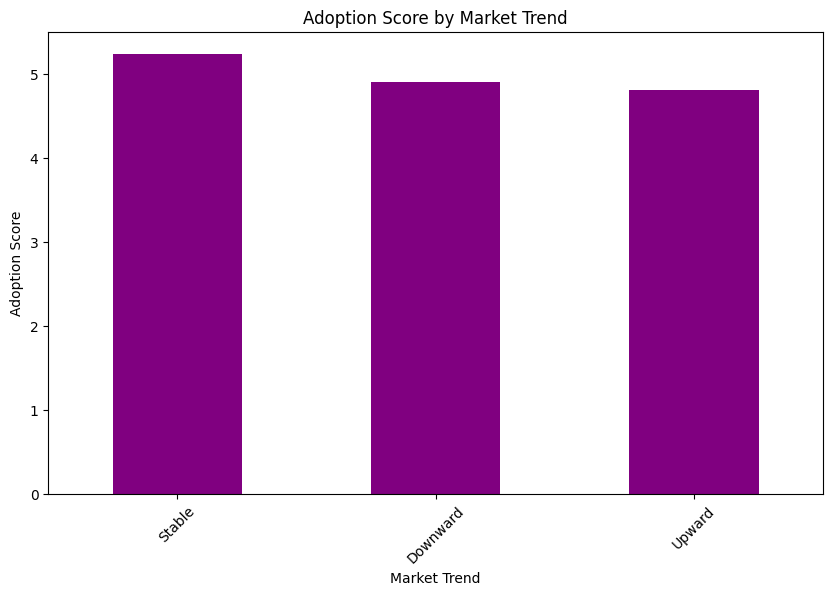

In [28]:
plt.figure(figsize=(10, 6))
trend_analysis.plot(kind='bar', color='purple')
plt.title("Adoption Score by Market Trend")
plt.xlabel("Market Trend")
plt.ylabel("Adoption Score")
plt.xticks(rotation=45)
plt.show()


Feedback-Based Segmentation

In [29]:
feedback_analysis = df.groupby('Feedback Score')[['Influencer Score', 'Regulation Score']].mean()
print(feedback_analysis)



                Influencer Score  Regulation Score
Feedback Score                                    
0.01                        0.86               4.0
0.06                        9.76               2.9
0.07                        4.83               2.7
0.09                        9.29               3.7
0.10                        5.45               4.4
...                          ...               ...
9.88                        1.20               4.2
9.90                        3.21               0.5
9.95                        0.73               3.4
9.98                        5.54               4.4
9.99                        1.13               4.1

[475 rows x 2 columns]


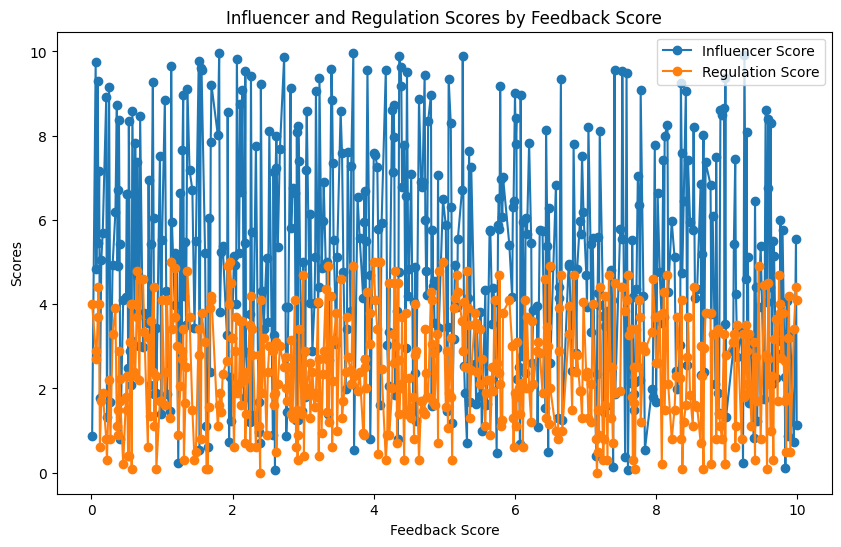

In [30]:
feedback_analysis.plot(kind='line', figsize=(10, 6), marker='o')
plt.title("Influencer and Regulation Scores by Feedback Score")
plt.xlabel("Feedback Score")
plt.ylabel("Scores")
plt.legend(["Influencer Score", "Regulation Score"])
plt.show()


In [31]:
gdp_per_capita_cluster = cluster_summary['GDP per Capita']
print(gdp_per_capita_cluster)


Cluster
0    40994.655447
1    56777.247234
2    27000.803981
Name: GDP per Capita, dtype: float64


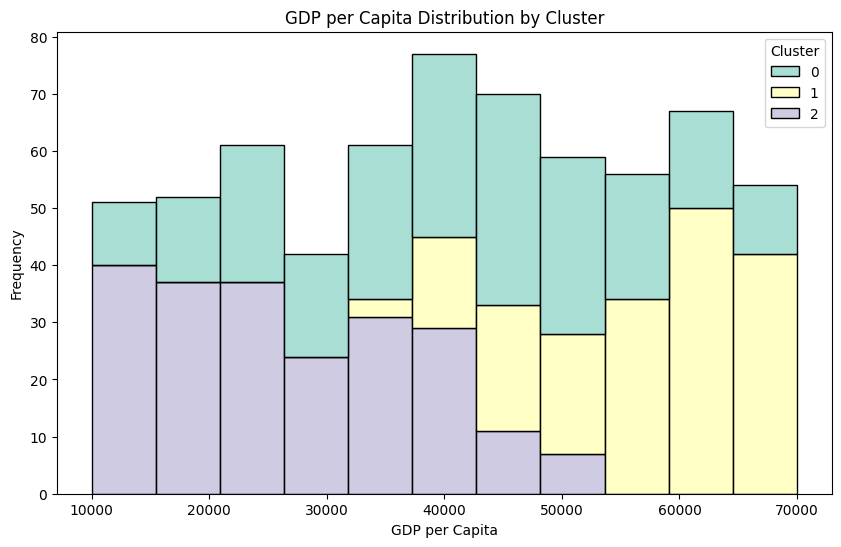

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='GDP per Capita', hue='Cluster', multiple='stack', palette='Set3')
plt.title('GDP per Capita Distribution by Cluster')
plt.xlabel('GDP per Capita')
plt.ylabel('Frequency')
plt.show()



In [33]:
cluster_gdp_summary = df.groupby('Cluster')['GDP per Capita'].describe()
print(cluster_gdp_summary)


         count          mean           std       min         25%        50%  \
Cluster                                                                       
0        246.0  40994.655447  14683.484244  11187.74  30092.1275  42057.430   
1        188.0  56777.247234   8899.519212  33567.63  50011.8175  58788.130   
2        216.0  27000.803981  11168.426122  10026.57  17427.6850  25273.405   

                75%       max  
Cluster                        
0        52607.7475  69972.64  
1        63887.1875  69967.97  
2        35783.3625  52777.60  


In [34]:
print(df.columns)

Index(['Company Name', 'Company Size', 'Industry', 'Region',
       'Tech Adoption Year', 'Adoption Score', 'GDP per Capita',
       'Market Trend', 'Regulation Score', 'Influencer Score',
       'Feedback Score', 'Cluster'],
      dtype='object')


predict Revenue or Sales.

analyzing the change post-tech adoption 

Create a Feature for Pre/Post-Tech Adoption:

In [35]:
df['Revenue Pre Tech'] = np.random.uniform(100000, 200000, size=len(df))  
df['Revenue Post Tech'] = df['Revenue Pre Tech'] * (1 + df['Adoption Score'] * 1.2) 

In [51]:
revenue_by_size = df.groupby('Company Size')[['Revenue Pre Tech', 'Revenue Post Tech']].sum()
print(revenue_by_size)


              Revenue Pre Tech  Revenue Post Tech
Company Size                                     
Large             3.136655e+07       2.220120e+08
Medium            3.039986e+07       2.120049e+08
Small             3.474788e+07       2.453141e+08


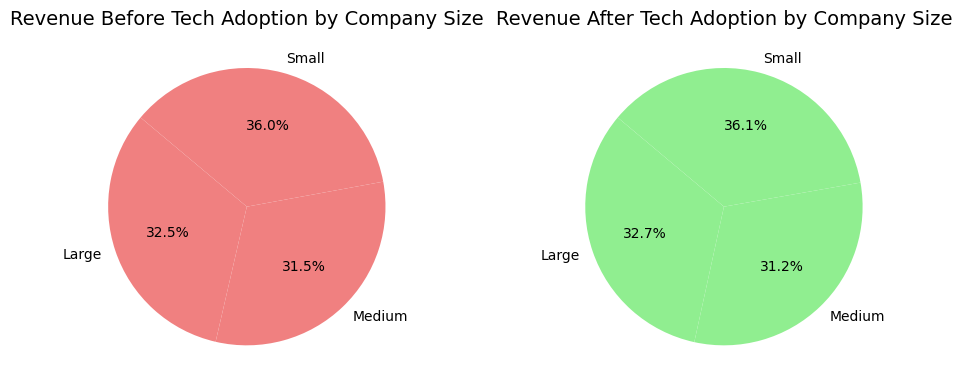

In [52]:
revenue_by_size = df.groupby('Company Size')[['Revenue Pre Tech', 'Revenue Post Tech']].sum()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].pie(revenue_by_size['Revenue Pre Tech'], labels=revenue_by_size.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral'])
axes[0].set_title('Revenue Before Tech Adoption by Company Size', fontsize=14)
axes[1].pie(revenue_by_size['Revenue Post Tech'], labels=revenue_by_size.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen'])
axes[1].set_title('Revenue After Tech Adoption by Company Size', fontsize=14)
plt.tight_layout()
plt.show()


In [37]:
print(df.columns)

Index(['Company Name', 'Company Size', 'Industry', 'Region',
       'Tech Adoption Year', 'Adoption Score', 'GDP per Capita',
       'Market Trend', 'Regulation Score', 'Influencer Score',
       'Feedback Score', 'Cluster', 'Revenue Pre Tech', 'Revenue Post Tech'],
      dtype='object')


In [38]:
le_company_size = LabelEncoder()
df['Company Size Encoded'] = le_company_size.fit_transform(df['Company Size'])
le_market_trend = LabelEncoder()
df['Market Trend Encoded'] = le_market_trend.fit_transform(df['Market Trend'])

Define Features and Target Variable

In [39]:
features = ['Adoption Score', 'Market Trend Encoded', 'Feedback Score', 'Company Size Encoded']
X = df[features]
y = df['Revenue Post Tech']  


Fit the Model and Benchmark

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 63543619579.60335
R-squared: 0.8210876730198329


Benchmark by Company Size

In [41]:
company_sizes = df['Company Size'].unique()  # Get unique company sizes
predicted_revenues = {}

for size in company_sizes:
    company_size_data = df[df['Company Size'] == size][features]
    predicted_revenue = model.predict(company_size_data)
    predicted_revenues[size] = predicted_revenue.mean()
predicted_revenues_df = pd.DataFrame(predicted_revenues.items(), columns=['Company Size', 'Predicted Revenue'])
print(predicted_revenues_df)


  Company Size  Predicted Revenue
0        Large       1.048229e+06
1        Small       1.055681e+06
2       Medium       1.037298e+06


benchmark with another models

In [42]:
le_company_size = LabelEncoder()
df['Company Size Encoded'] = le_company_size.fit_transform(df['Company Size'])

le_market_trend = LabelEncoder()
df['Market Trend Encoded'] = le_market_trend.fit_transform(df['Market Trend'])
features = ['Adoption Score', 'Market Trend Encoded', 'Feedback Score', 'Company Size Encoded']
X = df[features]
y = df['Revenue Post Tech'] 


1. Random Forest Regressor

In [43]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest Regressor:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regressor:
Mean Squared Error: 63543619579.60335
R-squared: 0.8210876730198329


2. Gradient Boosting Regressor

In [44]:

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)

print("Gradient Boosting Regressor:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R-squared: {gb_r2}")


Gradient Boosting Regressor:
Mean Squared Error: 63637192779.35394
R-squared: 0.8208242099212383


3. Linear Regression

In [45]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {lr_mse}")
print(f"R-squared: {lr_r2}")


Linear Regression:
Mean Squared Error: 53799337615.90627
R-squared: 0.8485235064270239


4. Support Vector Regressor (SVR)

In [46]:
svr_model = SVR()
svr_model.fit(X_train, y_train)

svr_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)

print("Support Vector Regressor:")
print(f"Mean Squared Error: {svr_mse}")
print(f"R-squared: {svr_r2}")


Support Vector Regressor:
Mean Squared Error: 355594863610.2619
R-squared: -0.0012068077268982957


5. K-Nearest Neighbors (KNN)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

print("K-Nearest Neighbors:")
print(f"Mean Squared Error: {knn_mse}")
print(f"R-squared: {knn_r2}")


K-Nearest Neighbors:
Mean Squared Error: 71402040353.04417
R-squared: 0.7989616380808839


Compare the Results

In [48]:
benchmark_results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Linear Regression', 'SVR', 'KNN'],
    'MSE': [rf_mse, gb_mse, lr_mse, svr_mse, knn_mse],
    'R-squared': [rf_r2, gb_r2, lr_r2, svr_r2, knn_r2]
})

print(benchmark_results)


               Model           MSE  R-squared
0      Random Forest  6.354362e+10   0.821088
1  Gradient Boosting  6.363719e+10   0.820824
2  Linear Regression  5.379934e+10   0.848524
3                SVR  3.555949e+11  -0.001207
4                KNN  7.140204e+10   0.798962


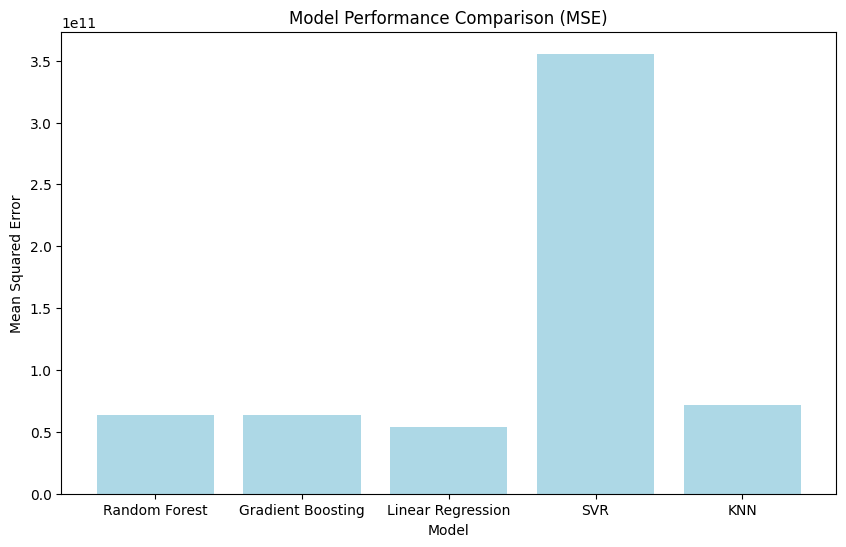

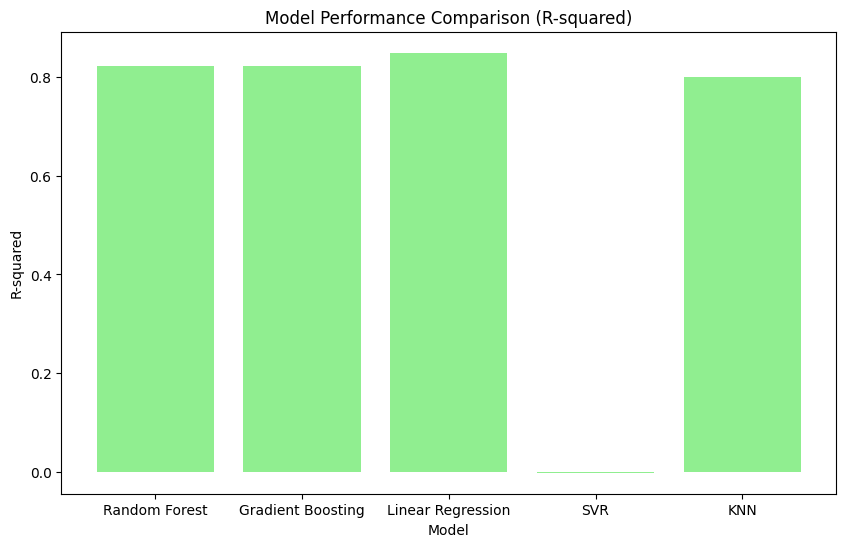

In [49]:
plt.figure(figsize=(10, 6))
plt.bar(benchmark_results['Model'], benchmark_results['MSE'], color='lightblue')
plt.title('Model Performance Comparison (MSE)')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(benchmark_results['Model'], benchmark_results['R-squared'], color='lightgreen')
plt.title('Model Performance Comparison (R-squared)')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.show()
